In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

2024-01-05 21:38:24.787537: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import yfinance as yf # yfinance is used to download the data from yahoo finance

In [4]:
btc_data  = yf.download('BTC-USD' , period='3600d')
df = btc_data[['Open', 'High', 'Low', 'Close' , 'Adj Close', 'Volume']]  # İlgili sütunların seçilmesi

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
df.info()  # Veri setinin bilgileri

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3398 entries, 2014-09-17 to 2024-01-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3398 non-null   float64
 1   High       3398 non-null   float64
 2   Low        3398 non-null   float64
 3   Close      3398 non-null   float64
 4   Adj Close  3398 non-null   float64
 5   Volume     3398 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 185.8 KB


In [6]:
len(df)  # Veri setinin uzunluğu

3398

In [7]:
# Only want closing price for each day 
bitcoin_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"}) # Sadece kapanış fiyatlarını alıyoruz ve sütun ismini değiştiriyoruz
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


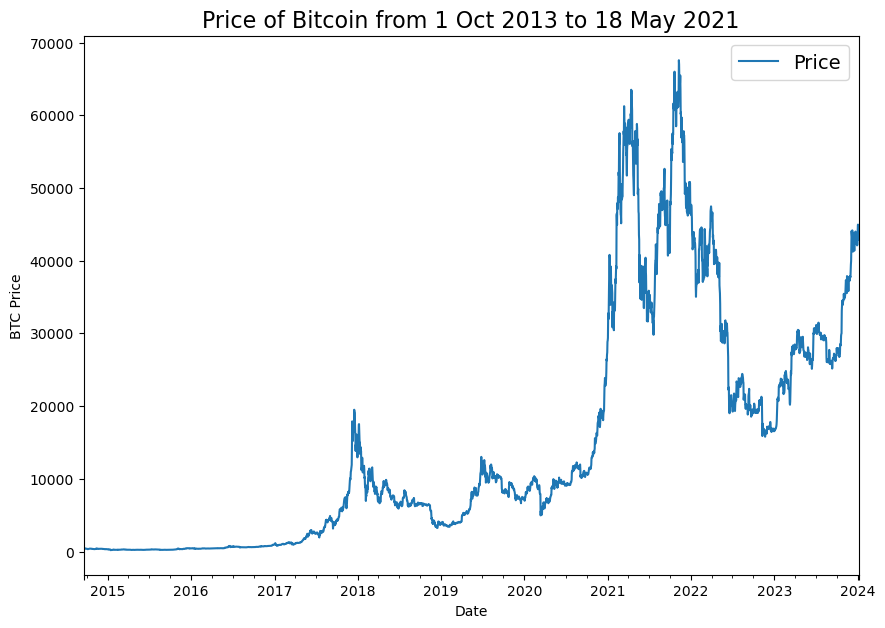

In [8]:
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [9]:
# Formatting historical Bitcoin data with Python
from datetime import datetime

timesteps = []
btc_price = []


# ilk 10 satırın gösterilmesi
for row in df.itertuples():
  timesteps.append(row.Index)
  btc_price.append(row.Close)





timesteps[:10], btc_price[:10]

([Timestamp('2014-09-17 00:00:00'),
  Timestamp('2014-09-18 00:00:00'),
  Timestamp('2014-09-19 00:00:00'),
  Timestamp('2014-09-20 00:00:00'),
  Timestamp('2014-09-21 00:00:00'),
  Timestamp('2014-09-22 00:00:00'),
  Timestamp('2014-09-23 00:00:00'),
  Timestamp('2014-09-24 00:00:00'),
  Timestamp('2014-09-25 00:00:00'),
  Timestamp('2014-09-26 00:00:00')],
 [457.3340148925781,
  424.44000244140625,
  394.7959899902344,
  408.90399169921875,
  398.8210144042969,
  402.1520080566406,
  435.7909851074219,
  423.2049865722656,
  411.5740051269531,
  404.42498779296875])

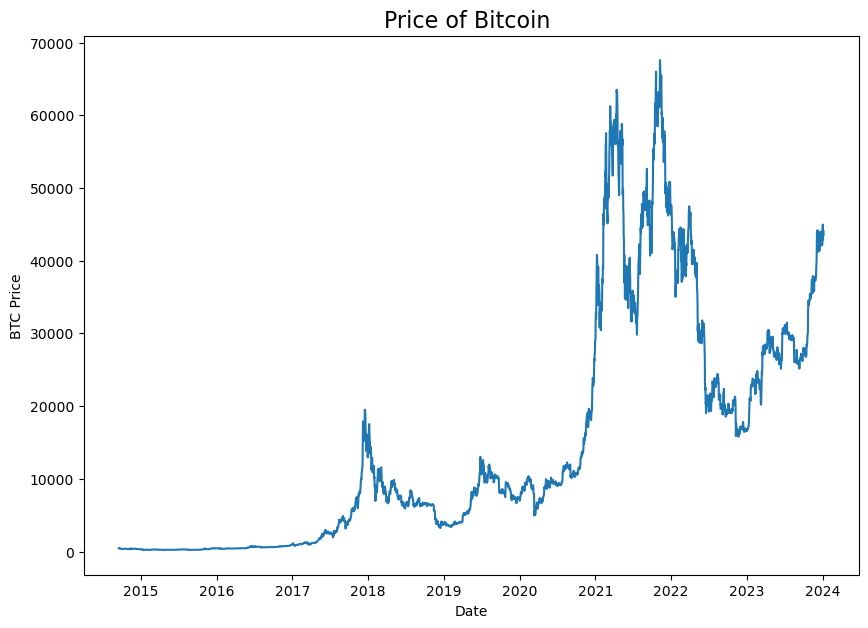

In [10]:
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin ", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

In [11]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000',
        '2014-09-19T00:00:00.000000000', '2014-09-20T00:00:00.000000000',
        '2014-09-21T00:00:00.000000000', '2014-09-22T00:00:00.000000000',
        '2014-09-23T00:00:00.000000000', '2014-09-24T00:00:00.000000000',
        '2014-09-25T00:00:00.000000000', '2014-09-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([457.33401489, 424.44000244, 394.79598999, 408.9039917 ,
        398.8210144 , 402.15200806, 435.79098511, 423.20498657,
        411.57400513, 404.42498779]))

In [12]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2718, 680, 2718, 680)

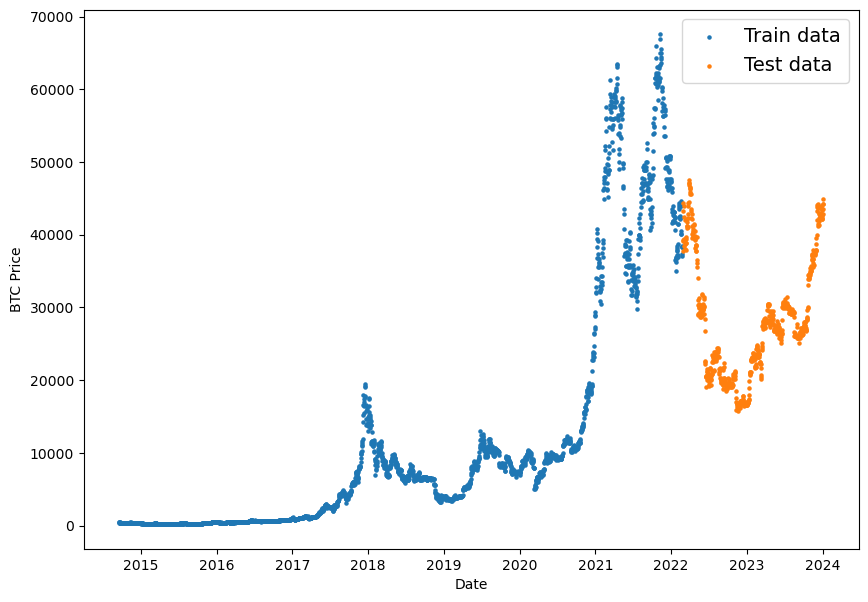

In [13]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [14]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

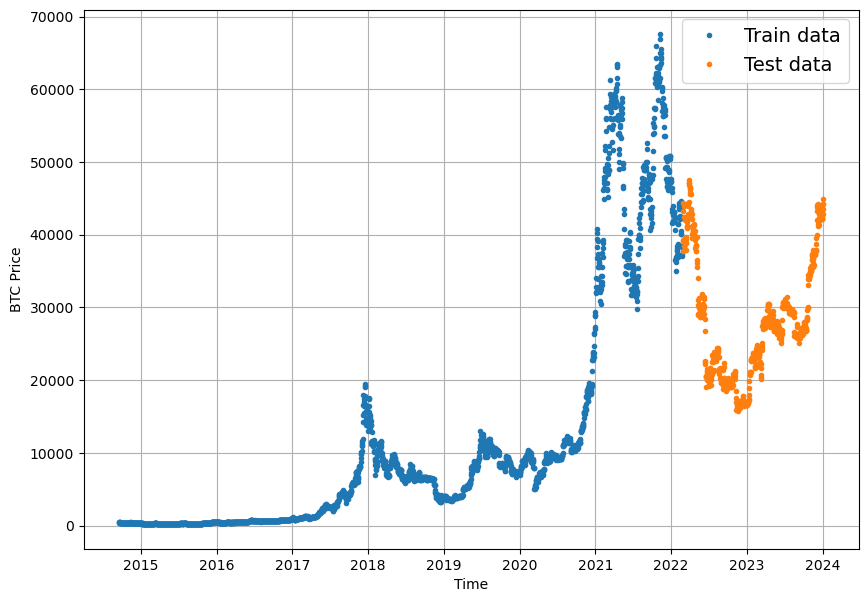

In [15]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [16]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy()
          }

In [17]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

27630.6740435432

In [18]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [19]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [20]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [21]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [22]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3391, 3391)

In [23]:
#örnek 3 satırın düzenli şekilde gösterilmesi
for i in range(3):
  print(f"Window: {full_windows[i]} \n -> Label: {full_labels[i]}")


Window: [457.33401489 424.44000244 394.79598999 408.9039917  398.8210144
 402.15200806 435.79098511] 
 -> Label: [423.20498657]
Window: [424.44000244 394.79598999 408.9039917  398.8210144  402.15200806
 435.79098511 423.20498657] 
 -> Label: [411.57400513]
Window: [394.79598999 408.9039917  398.8210144  402.15200806 435.79098511
 423.20498657 411.57400513] 
 -> Label: [404.42498779]


In [24]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]}  \n -> Label: {full_labels[i-3]}")

Window: [43442.85546875 42627.85546875 42099.40234375 42156.90234375
 42265.1875     44167.33203125 44957.96875   ]  
 -> Label: [42848.17578125]
Window: [42627.85546875 42099.40234375 42156.90234375 42265.1875
 44167.33203125 44957.96875    42848.17578125]  
 -> Label: [44179.921875]
Window: [42099.40234375 42156.90234375 42265.1875     44167.33203125
 44957.96875    42848.17578125 44179.921875  ]  
 -> Label: [43528.07421875]


Turning windows into training and test sets

In [25]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [26]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)
     

(2712, 679, 2712, 679)

In [27]:
train_windows[:5], train_labels[:5]

(array([[457.33401489, 424.44000244, 394.79598999, 408.9039917 ,
         398.8210144 , 402.15200806, 435.79098511],
        [424.44000244, 394.79598999, 408.9039917 , 398.8210144 ,
         402.15200806, 435.79098511, 423.20498657],
        [394.79598999, 408.9039917 , 398.8210144 , 402.15200806,
         435.79098511, 423.20498657, 411.57400513],
        [408.9039917 , 398.8210144 , 402.15200806, 435.79098511,
         423.20498657, 411.57400513, 404.42498779],
        [398.8210144 , 402.15200806, 435.79098511, 423.20498657,
         411.57400513, 404.42498779, 399.51998901]]),
 array([[423.20498657],
        [411.57400513],
        [404.42498779],
        [399.51998901],
        [377.18099976]]))

In [28]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])


False

In [29]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file
 

## model 1

In [30]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100


 1/22 [>.............................] - ETA: 12s - loss: 11514.0430 - mae: 11514.0430INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 1s 25ms/step - loss: 7072.2251 - mae: 7072.2251 - val_loss: 3717.1270 - val_mae: 3717.1270
Epoch 2/100
 1/22 [>.............................] - ETA: 0s - loss: 1456.2434 - mae: 1456.2434INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 15ms/step - loss: 1220.8629 - mae: 1220.8629 - val_loss: 883.9357 - val_mae: 883.9357
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 619.7921 - mae: 619.7921 - val_loss: 1120.6958 - val_mae: 1120.6958
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 583.1334 - mae: 583.1334 - val_loss: 927.8431 - val_mae: 927.8431
Epoch 5/100
 1/22 [>.............................] - ETA: 0s - loss: 661.7505 - mae: 661.7505INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 14ms/step - loss: 549.8857 - mae: 549.8857 - val_loss: 845.7468 - val_mae: 845.7468
Epoch 6/100
 1/22 [>.............................] - ETA: 0s - loss: 373.9246 - mae: 373.9246INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 14ms/step - loss: 529.4067 - mae: 529.4067 - val_loss: 805.3067 - val_mae: 805.3067
Epoch 7/100
 1/22 [>.............................] - ETA: 0s - loss: 565.6112 - mae: 565.6112INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 18ms/step - loss: 520.5148 - mae: 520.5148 - val_loss: 783.6958 - val_mae: 783.6958
Epoch 8/100
 1/22 [>.............................] - ETA: 0s - loss: 361.8090 - mae: 361.8090INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 14ms/step - loss: 518.1769 - mae: 518.1769 - val_loss: 767.8013 - val_mae: 767.8013
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 509.2141 - mae: 509.2141 - val_loss: 846.8768 - val_mae: 846.8768
Epoch 10/100
 1/22 [>.............................] - ETA: 0s - loss: 335.5762 - mae: 335.5762INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 14ms/step - loss: 488.7004 - mae: 488.7004 - val_loss: 739.0780 - val_mae: 739.0780
Epoch 11/100
22/22 [==============================] - 0s 2ms/step - loss: 483.7428 - mae: 483.7428 - val_loss: 902.9587 - val_mae: 902.9587
Epoch 12/100
22/22 [==============================] - 0s 2ms/step - loss: 482.4853 - mae: 482.4853 - val_loss: 831.2352 - val_mae: 831.2352
Epoch 13/100
22/22 [==============================] - 0s 2ms/step - loss: 481.2129 - mae: 481.2129 - val_loss: 1055.6016 - val_mae: 1055.6016
Epoch 14/100
22/22 [==============================] - 0s 2ms/step - loss: 460.0820 - mae: 460.0820 - val_loss: 765.4403 - val_mae: 765.4403
Epoch 15/100
22/22 [==============================] - 0s 2ms/step - loss: 457.5306 - mae: 457.5306 - val_loss: 791.7798 - val_mae: 791.7798
Epoch 16/100
 1/22 [>.............................] - ETA: 0s - loss: 606.3312 - mae: 606.3312INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 13ms/step - loss: 436.7067 - mae: 436.7067 - val_loss: 721.0605 - val_mae: 721.0605
Epoch 17/100
 1/22 [>.............................] - ETA: 0s - loss: 443.2666 - mae: 443.2666INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 13ms/step - loss: 415.4851 - mae: 415.4851 - val_loss: 646.9082 - val_mae: 646.9082
Epoch 18/100
22/22 [==============================] - 0s 2ms/step - loss: 435.3804 - mae: 435.3804 - val_loss: 674.1022 - val_mae: 674.1022
Epoch 19/100
 1/22 [>.............................] - ETA: 0s - loss: 299.8960 - mae: 299.8960INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 14ms/step - loss: 433.8546 - mae: 433.8546 - val_loss: 638.9656 - val_mae: 638.9656
Epoch 20/100
22/22 [==============================] - 0s 2ms/step - loss: 404.2995 - mae: 404.2995 - val_loss: 654.7891 - val_mae: 654.7891
Epoch 21/100
 1/22 [>.............................] - ETA: 0s - loss: 444.4651 - mae: 444.4651INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 16ms/step - loss: 397.9030 - mae: 397.9030 - val_loss: 628.5362 - val_mae: 628.5362
Epoch 22/100
22/22 [==============================] - 0s 2ms/step - loss: 392.2257 - mae: 392.2257 - val_loss: 701.3450 - val_mae: 701.3450
Epoch 23/100
 1/22 [>.............................] - ETA: 0s - loss: 446.3730 - mae: 446.3730INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 14ms/step - loss: 396.6612 - mae: 396.6612 - val_loss: 617.5336 - val_mae: 617.5336
Epoch 24/100
22/22 [==============================] - 0s 2ms/step - loss: 387.4958 - mae: 387.4958 - val_loss: 734.4815 - val_mae: 734.4815
Epoch 25/100
22/22 [==============================] - 0s 2ms/step - loss: 408.8528 - mae: 408.8528 - val_loss: 700.0068 - val_mae: 700.0068
Epoch 26/100
22/22 [==============================] - 0s 2ms/step - loss: 406.0510 - mae: 406.0510 - val_loss: 869.8237 - val_mae: 869.8237
Epoch 27/100
22/22 [==============================] - 0s 2ms/step - loss: 396.6134 - mae: 396.6134 - val_loss: 688.2973 - val_mae: 688.2973
Epoch 28/100
22/22 [==============================] - 0s 2ms/step - loss: 378.9540 - mae: 378.9540 - val_loss: 783.6177 - val_mae: 783.6177
Epoch 29/100
 1/22 [>.............................] - ETA: 0s - loss: 397.7588 - mae: 397.7588INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 16ms/step - loss: 381.4688 - mae: 381.4688 - val_loss: 584.0963 - val_mae: 584.0963
Epoch 30/100
22/22 [==============================] - 0s 2ms/step - loss: 375.1028 - mae: 375.1028 - val_loss: 607.6279 - val_mae: 607.6279
Epoch 31/100
 1/22 [>.............................] - ETA: 0s - loss: 339.9793 - mae: 339.9793INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 15ms/step - loss: 368.2625 - mae: 368.2625 - val_loss: 575.6934 - val_mae: 575.6934
Epoch 32/100
22/22 [==============================] - 0s 3ms/step - loss: 371.6170 - mae: 371.6170 - val_loss: 726.0682 - val_mae: 726.0682
Epoch 33/100
22/22 [==============================] - 0s 3ms/step - loss: 390.4282 - mae: 390.4282 - val_loss: 685.1378 - val_mae: 685.1378
Epoch 34/100
 1/22 [>.............................] - ETA: 0s - loss: 254.5937 - mae: 254.5937INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 15ms/step - loss: 359.8420 - mae: 359.8420 - val_loss: 571.1530 - val_mae: 571.1530
Epoch 35/100
22/22 [==============================] - 0s 2ms/step - loss: 376.6648 - mae: 376.6648 - val_loss: 576.7279 - val_mae: 576.7279
Epoch 36/100
 1/22 [>.............................] - ETA: 0s - loss: 361.2310 - mae: 361.2310INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 15ms/step - loss: 370.3917 - mae: 370.3917 - val_loss: 564.9474 - val_mae: 564.9474
Epoch 37/100
22/22 [==============================] - 0s 3ms/step - loss: 358.8764 - mae: 358.8764 - val_loss: 573.1071 - val_mae: 573.1071
Epoch 38/100
22/22 [==============================] - 0s 3ms/step - loss: 367.7420 - mae: 367.7420 - val_loss: 630.5697 - val_mae: 630.5697
Epoch 39/100
22/22 [==============================] - 0s 2ms/step - loss: 354.0829 - mae: 354.0829 - val_loss: 590.0719 - val_mae: 590.0719
Epoch 40/100
 1/22 [>.............................] - ETA: 0s - loss: 343.9868 - mae: 343.9868INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 18ms/step - loss: 357.5054 - mae: 357.5054 - val_loss: 558.8923 - val_mae: 558.8923
Epoch 41/100
 1/22 [>.............................] - ETA: 0s - loss: 371.6691 - mae: 371.6691INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 1s 25ms/step - loss: 352.2456 - mae: 352.2456 - val_loss: 549.1300 - val_mae: 549.1300
Epoch 42/100
22/22 [==============================] - 0s 2ms/step - loss: 355.7910 - mae: 355.7910 - val_loss: 597.1516 - val_mae: 597.1516
Epoch 43/100
22/22 [==============================] - 0s 2ms/step - loss: 360.0586 - mae: 360.0586 - val_loss: 719.9626 - val_mae: 719.9626
Epoch 44/100
 1/22 [>.............................] - ETA: 0s - loss: 352.7249 - mae: 352.7249INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 16ms/step - loss: 374.3724 - mae: 374.3724 - val_loss: 544.6536 - val_mae: 544.6536
Epoch 45/100
22/22 [==============================] - 0s 3ms/step - loss: 353.7989 - mae: 353.7989 - val_loss: 559.9297 - val_mae: 559.9297
Epoch 46/100
22/22 [==============================] - 0s 2ms/step - loss: 348.6251 - mae: 348.6251 - val_loss: 557.1141 - val_mae: 557.1141
Epoch 47/100
22/22 [==============================] - 0s 2ms/step - loss: 346.1186 - mae: 346.1186 - val_loss: 610.1137 - val_mae: 610.1137
Epoch 48/100
22/22 [==============================] - 0s 2ms/step - loss: 357.4542 - mae: 357.4542 - val_loss: 810.2250 - val_mae: 810.2250
Epoch 49/100
22/22 [==============================] - 0s 2ms/step - loss: 367.3674 - mae: 367.3674 - val_loss: 792.1129 - val_mae: 792.1129
Epoch 50/100
 1/22 [>.............................] - ETA: 0s - loss: 372.5148 - mae: 372.5148INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 16ms/step - loss: 359.9651 - mae: 359.9651 - val_loss: 537.8629 - val_mae: 537.8629
Epoch 51/100
22/22 [==============================] - 0s 3ms/step - loss: 374.3972 - mae: 374.3972 - val_loss: 796.9786 - val_mae: 796.9786
Epoch 52/100
22/22 [==============================] - 0s 3ms/step - loss: 400.5837 - mae: 400.5837 - val_loss: 602.8958 - val_mae: 602.8958
Epoch 53/100
22/22 [==============================] - 0s 2ms/step - loss: 348.9143 - mae: 348.9143 - val_loss: 728.6627 - val_mae: 728.6627
Epoch 54/100
22/22 [==============================] - 0s 2ms/step - loss: 360.7651 - mae: 360.7651 - val_loss: 540.7726 - val_mae: 540.7726
Epoch 55/100
22/22 [==============================] - 0s 3ms/step - loss: 348.7791 - mae: 348.7791 - val_loss: 582.8089 - val_mae: 582.8089
Epoch 56/100
22/22 [==============================] - 0s 2ms/step - loss: 344.2579 - mae: 344.2579 - val_loss: 564.0100 - val_mae: 564.0100
Epoch 57/100
22/22 [============

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 16ms/step - loss: 342.8909 - mae: 342.8909 - val_loss: 535.2235 - val_mae: 535.2235
Epoch 63/100
 1/22 [>.............................] - ETA: 0s - loss: 240.1565 - mae: 240.1565INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 16ms/step - loss: 357.9147 - mae: 357.9147 - val_loss: 530.7628 - val_mae: 530.7628
Epoch 64/100
22/22 [==============================] - 0s 2ms/step - loss: 359.2112 - mae: 359.2112 - val_loss: 531.3687 - val_mae: 531.3687
Epoch 65/100
22/22 [==============================] - 0s 2ms/step - loss: 343.1056 - mae: 343.1056 - val_loss: 650.4492 - val_mae: 650.4492
Epoch 66/100
22/22 [==============================] - 0s 2ms/step - loss: 343.6630 - mae: 343.6630 - val_loss: 582.7400 - val_mae: 582.7400
Epoch 67/100
22/22 [==============================] - 0s 2ms/step - loss: 344.9044 - mae: 344.9044 - val_loss: 547.6133 - val_mae: 547.6133
Epoch 68/100
22/22 [==============================] - 0s 2ms/step - loss: 338.3837 - mae: 338.3837 - val_loss: 596.2874 - val_mae: 596.2874
Epoch 69/100
22/22 [==============================] - 0s 2ms/step - loss: 356.3576 - mae: 356.3576 - val_loss: 588.9003 - val_mae: 588.9003
Epoch 70/100
22/22 [============

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 14ms/step - loss: 342.6778 - mae: 342.6778 - val_loss: 530.6834 - val_mae: 530.6834
Epoch 79/100
22/22 [==============================] - 0s 2ms/step - loss: 339.2953 - mae: 339.2953 - val_loss: 554.2360 - val_mae: 554.2360
Epoch 80/100
22/22 [==============================] - 0s 2ms/step - loss: 346.7791 - mae: 346.7791 - val_loss: 545.8715 - val_mae: 545.8715
Epoch 81/100
22/22 [==============================] - 0s 2ms/step - loss: 383.9155 - mae: 383.9155 - val_loss: 541.1190 - val_mae: 541.1190
Epoch 82/100
 1/22 [>.............................] - ETA: 0s - loss: 305.9492 - mae: 305.9492INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 14ms/step - loss: 333.7397 - mae: 333.7397 - val_loss: 525.5346 - val_mae: 525.5346
Epoch 83/100
22/22 [==============================] - 0s 3ms/step - loss: 330.4984 - mae: 330.4984 - val_loss: 648.7059 - val_mae: 648.7059
Epoch 84/100
22/22 [==============================] - 0s 3ms/step - loss: 358.5175 - mae: 358.5175 - val_loss: 656.2435 - val_mae: 656.2435
Epoch 85/100
22/22 [==============================] - 0s 2ms/step - loss: 340.6475 - mae: 340.6475 - val_loss: 566.3618 - val_mae: 566.3618
Epoch 86/100
22/22 [==============================] - 0s 2ms/step - loss: 335.9925 - mae: 335.9925 - val_loss: 594.3838 - val_mae: 594.3838
Epoch 87/100
22/22 [==============================] - 0s 2ms/step - loss: 346.2322 - mae: 346.2322 - val_loss: 632.0948 - val_mae: 632.0948
Epoch 88/100
22/22 [==============================] - 0s 2ms/step - loss: 337.7237 - mae: 337.7237 - val_loss: 569.9376 - val_mae: 569.9376
Epoch 89/100
22/22 [============

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 15ms/step - loss: 364.5081 - mae: 364.5081 - val_loss: 525.1225 - val_mae: 525.1225
Epoch 97/100
22/22 [==============================] - 0s 2ms/step - loss: 330.3791 - mae: 330.3791 - val_loss: 591.1864 - val_mae: 591.1864
Epoch 98/100
22/22 [==============================] - 0s 2ms/step - loss: 341.2161 - mae: 341.2161 - val_loss: 527.9535 - val_mae: 527.9535
Epoch 99/100
22/22 [==============================] - 0s 2ms/step - loss: 330.1186 - mae: 330.1186 - val_loss: 531.2554 - val_mae: 531.2554
Epoch 100/100
22/22 [==============================] - 0s 2ms/step - loss: 332.0685 - mae: 332.0685 - val_loss: 550.8353 - val_mae: 550.8353


In [31]:

# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 1ms/step - loss: 550.8353 - mae: 550.8353


[550.8353271484375, 550.8353271484375]

In [32]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)
     

22/22 [==============================] - 0s 1ms/step - loss: 525.1224 - mae: 525.1224


[525.1224365234375, 525.1224365234375]

In [33]:

def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [34]:

# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

22/22 [==============================] - 0s 2ms/step


(679,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([39130.33 , 39097.438, 38023.094, 42524.227, 44471.617, 44231.715,
        42872.035, 39319.53 , 39420.133, 38462.76 ], dtype=float32)>)

In [35]:

# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 525.1223, 'mse': 665156.5, 'rmse': 815.5713, 'mape': 1.8893912}

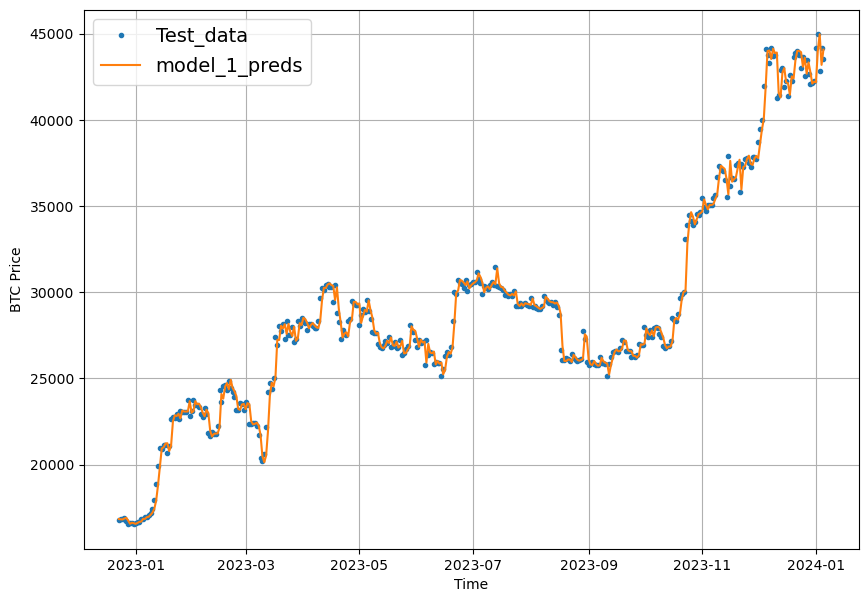

In [36]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")
     

## Model 3 DENSE (win = 30 horizon = 7)

In [37]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)


(3362, 3362)

In [38]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)
     


(2689, 673, 2689, 673)

In [39]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


In [40]:

# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

 1/22 [>.............................] - ETA: 0s - loss: 3096.9714

22/22 [==============================] - 0s 988us/step - loss: 2655.9824


2655.982421875

In [41]:

# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 1ms/step - loss: 1119.6500


1119.6500244140625

In [42]:


# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

22/22 [==============================] - 0s 881us/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[38434.65 , 37488.906, 38573.574, 38211.457, 38600.535, 37200.836,
        39180.516],
       [39745.98 , 38745.51 , 38696.684, 38439.938, 38535.715, 38558.977,
        39313.34 ],
       [38316.684, 38685.03 , 37607.684, 38313.01 , 37771.64 , 38182.258,
        37596.55 ],
       [41003.094, 40517.06 , 40237.34 , 40587.594, 41370.79 , 39784.34 ,
        41977.504],
       [42893.49 , 43114.53 , 43345.688, 42993.85 , 43720.926, 41604.703,
        43316.5  ]], dtype=float32)>

In [43]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([3181.6663 , 3172.5715 , 3487.0134 , 2524.7231 , 3273.9363 ,
        4035.1719 , 3536.8962 , 2357.957  , 1480.1361 ,  889.0229 ,
        1708.3923 , 1155.3538 , 1399.7969 , 1652.0306 , 1572.1395 ,
        2623.014  , 3141.6099 , 3187.3225 , 3647.254  , 2178.3801 ,
        1627.8103 , 1457.217  , 1385.5228 , 2494.1714 , 3560.3572 ,
        3408.4995 , 3443.066  , 2626.4397 , 2294.2126 , 1883.3142 ,
         826.60266,  646.69977,  775.0714 , 1318.7115 , 1081.885  ,
        1980.6278 , 2171.8577 , 2773.976  , 3727.734  , 3858.9124 ,
        2447.494  , 2334.0854 , 1740.4967 , 2151.5352 , 1810.1658 ,
         575.5201 ,  537.4274 ,  730.15735,  702.30524,  822.1546 ,
         919.59656,  651.6378 ,  719.4297 , 1178.774  , 1832.2098 ,
        1437.2294 ,  912.846  ,  923.0876 ,  580.4096 , 1058.3147 ,
         528.81586,  759.3086 , 1327.1139 ,  951.31195,  885.40344,
        1496.3806 , 2507.2249 , 3438.323  , 4892.9233 , 5047.401  ,
        5305.846  , 5183.6255 , 4655.8857

In [44]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),}

In [45]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results


{'mae': 1119.6498, 'mse': 2918740.2, 'rmse': 1294.7014, 'mape': 4.10581}

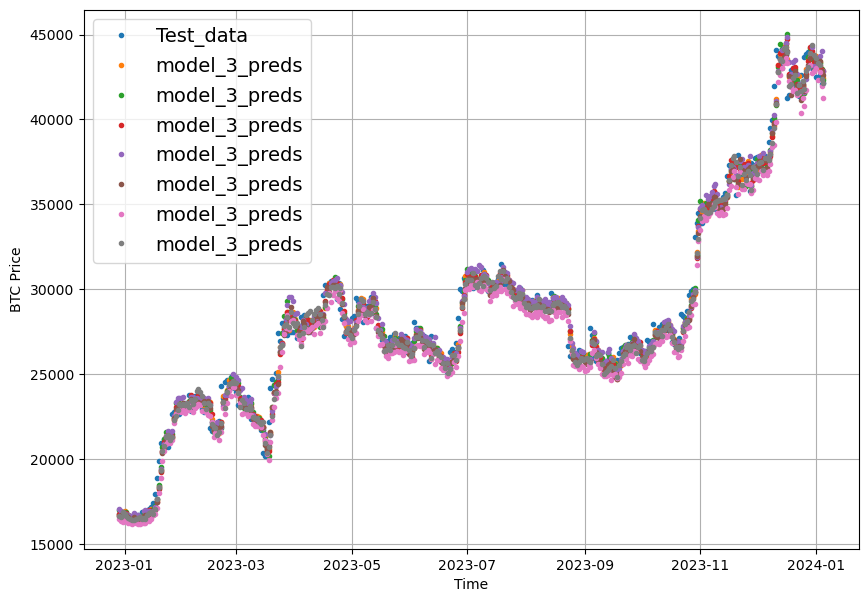

In [46]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")
     


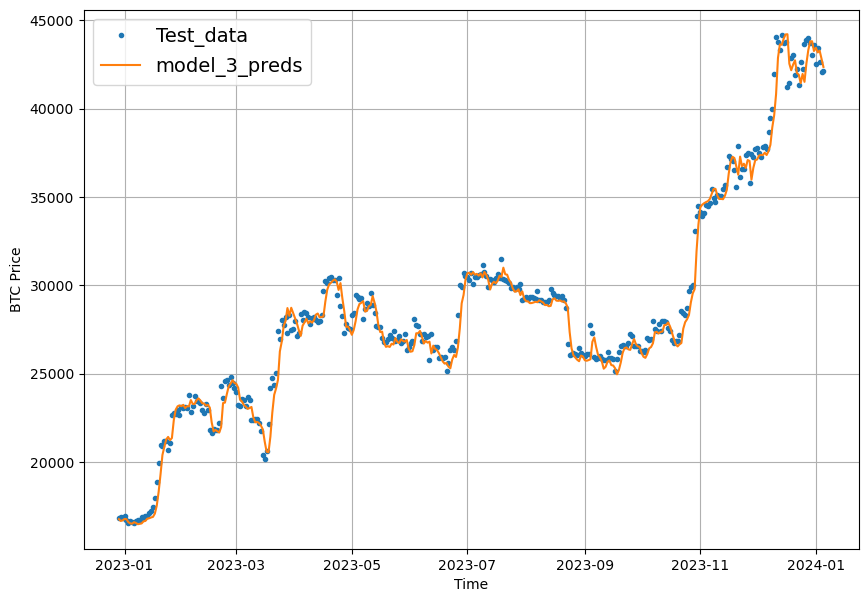

In [47]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")


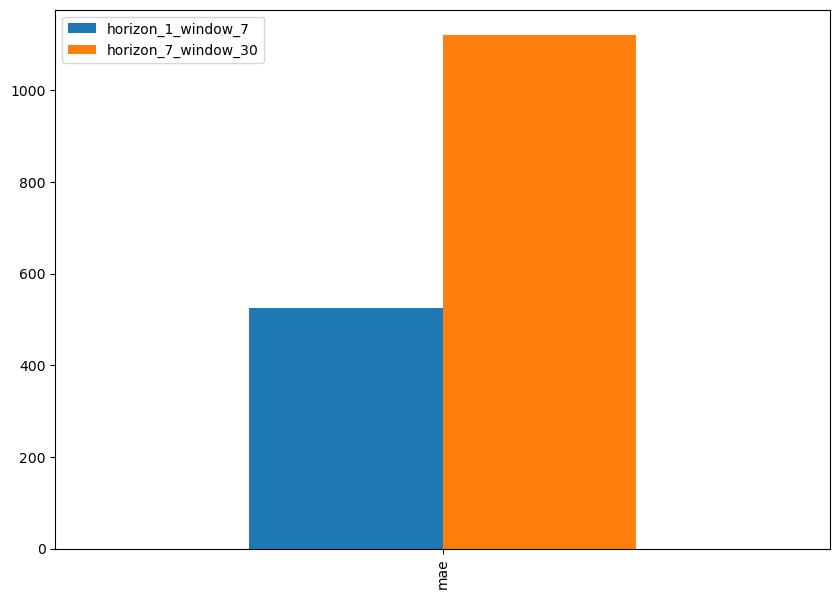

In [48]:
pd.DataFrame({
              "horizon_1_window_7": model_1_results["mae"], 
               
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");


## Model 5  RNN (LSTM )

In [49]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])
     


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


In [50]:

# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 1ms/step - loss: 1139.4878


1139.48779296875

In [51]:

# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

22/22 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[38183.28 , 38413.734, 38579.57 , 38186.34 , 38578.51 , 38465.73 ,
        38976.418],
       [38187.594, 38588.188, 38985.24 , 38636.402, 38868.406, 38899.805,
        39043.496],
       [37765.203, 38136.18 , 38567.9  , 38370.72 , 38337.297, 38444.195,
        38750.418],
       [39952.18 , 39905.133, 40301.734, 39983.18 , 40381.51 , 40394.926,
        40475.906],
       [41924.19 , 41164.383, 41890.156, 42041.906, 42365.355, 42186.42 ,
        42109.465],
       [43126.215, 42629.363, 42916.65 , 43090.418, 43302.91 , 43251.73 ,
        42958.59 ],
       [43782.57 , 42846.684, 42947.156, 43062.793, 43597.9  , 43408.727,
        43767.24 ],
       [42163.54 , 41775.31 , 41773.664, 41658.02 , 42103.418, 42277.36 ,
        42550.04 ],
       [41178.145, 41361.45 , 41449.727, 41373.27 , 41071.332, 41700.344,
        41601.34 ],
       [39984.54 , 40194.766, 40377.69 , 40145.117, 40295.63 , 40681.344,
        40518.87 ]], dtype=floa

In [52]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results


{'mae': 1139.4878, 'mse': 3089158.8, 'rmse': 1293.65, 'mape': 4.2077904}

# Multivariate time series 

In [53]:

# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [54]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")



# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
#block_reward_2_days, block_reward_3_days


# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-09-17,457.334015,25
2014-09-18,424.440002,25
2014-09-19,394.795990,25
2014-09-20,408.903992,25
2014-09-21,398.821014,25


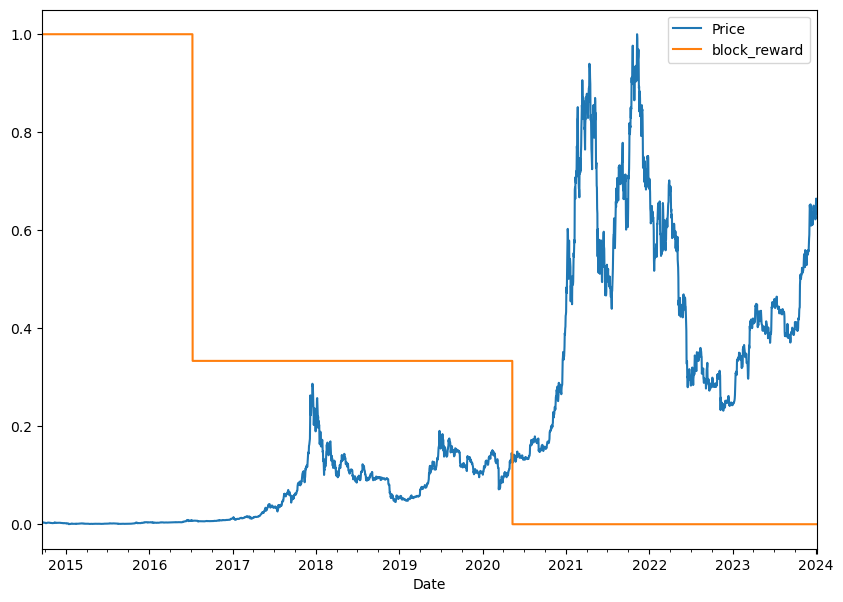

In [55]:

# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [56]:

# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [57]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
2014-09-22,402.152008,25,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN
2014-09-23,435.790985,25,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN
2014-09-24,423.204987,25,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,25,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002


In [58]:


# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32) 
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-24,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,25.0,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,25.0,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,25.0,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [59]:
# View labels
y.head()


Date
2014-09-24    423.204987
2014-09-25    411.574005
2014-09-26    404.424988
2014-09-27    399.519989
2014-09-28    377.181000
Name: Price, dtype: float32

In [60]:

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2712, 2712, 679, 679)

## model 6 Multivariate time series (DENSE)

In [61]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])
  

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


In [62]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

22/22 [==============================] - 0s 1ms/step - loss: 525.3386


525.3385620117188

In [63]:

# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]


22/22 [==============================] - 0s 810us/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([39022.773, 39115.242, 37994.867, 42431.062, 44306.844, 44208.12 ,
       42824.633, 39581.44 , 39456.21 , 38407.5  ], dtype=float32)>

In [64]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 525.3386, 'mse': 666197.94, 'rmse': 816.2095, 'mape': 1.891881}

## Model 9: Train a model on the full historical data to make predictions into future

In [65]:
bitcoin_prices_windowed.head()


,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [66]:
# Train model on entire data to make prediction for the next day 
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [67]:

# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [68]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before
     

In [69]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days


In [70]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [71]:

# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts 
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 50ms/step
Predicting on: 
 [42156.90234375 42265.1875     44167.33203125 44957.96875
 42848.17578125 44179.921875   43528.07421875] -> Prediction: 42227.34375

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [42265.1875     44167.33203125 44957.96875    42848.17578125
 44179.921875   43528.07421875 42227.34375   ] -> Prediction: 43079.0625

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [44167.33203125 44957.96875    42848.17578125 44179.921875
 43528.07421875 42227.34375    43079.0625    ] -> Prediction: 44452.47265625

1/1 [==============================] - 0s 16ms/step
Predicting on: 
 [44957.96875    42848.17578125 44179.921875   43528.07421875
 42227.34375    43079.0625     44452.47265625] -> Prediction: 43769.578125

1/1 [==============================] - 0s 15ms/step
Predicting on: 
 [42848.17578125 44179.921875   43528.07421875 42227.34375
 43079.0625     44452.47265625 43769.578125  ] -> Predi

In [72]:
future_forecast[:10]


[42227.344,
 43079.062,
 44452.473,
 43769.58,
 43231.844,
 43513.008,
 42811.56,
 42621.87,
 43640.203,
 43955.465]

In [73]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date
     


In [74]:

# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep


Timestamp('2024-01-05 00:00:00')

In [75]:

# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09',
       '2024-01-10', '2024-01-11', '2024-01-12', '2024-01-13',
       '2024-01-14', '2024-01-15', '2024-01-16', '2024-01-17',
       '2024-01-18', '2024-01-19'], dtype='datetime64[D]')

In [76]:

# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
        '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
        '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
        '2024-01-17', '2024-01-18', '2024-01-19'], dtype='datetime64[D]'),
 array([43528.074, 42227.344, 43079.062, 44452.473, 43769.58 , 43231.844,
        43513.008, 42811.56 , 42621.87 , 43640.203, 43955.465, 43296.01 ,
        43093.113, 42980.06 , 42677.285], dtype=float32))

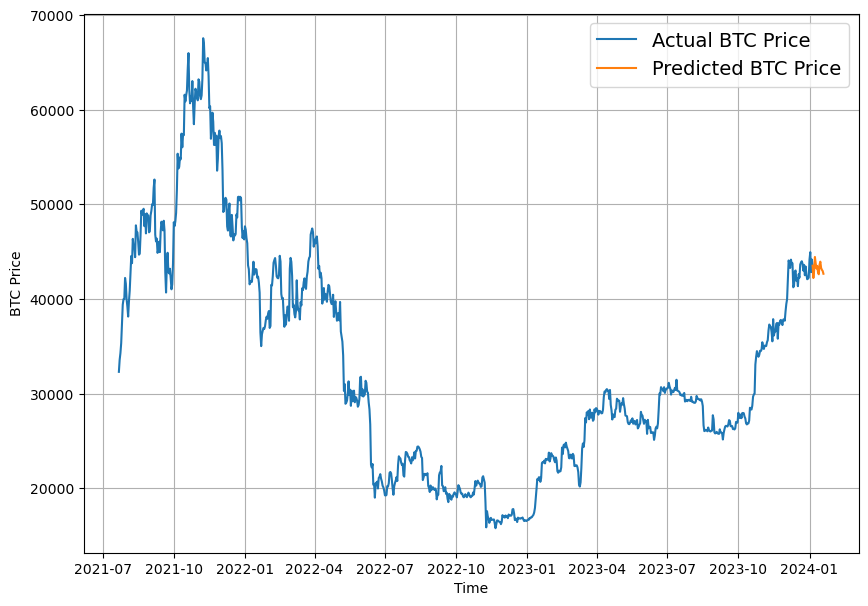

In [77]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")


In [78]:
#future forecastın tarihlerini ve fiyatları bana yaz
future_forecast = pd.DataFrame(future_forecast, columns=["Price"])
future_forecast["Date"] = next_time_steps
future_forecast.set_index("Date", inplace=True)
future_forecast


,Price
Date,
2024-01-05,43528.074219
2024-01-06,42227.343750
2024-01-07,43079.062500
2024-01-08,44452.472656
2024-01-09,43769.578125
2024-01-10,43231.843750
2024-01-11,43513.007812
2024-01-12,42811.558594
2024-01-13,42621.871094
